## M2 - Model prediksi titik panas di Sumatera Selatan 2001 - 2023

In [1]:
# load all functions
from C01_data_collection import *
from C02_visualization import *
from C03_preprocessing import *
from C04_model_predictions import *
from C05_model_evaluate import *

- config models

In [2]:
# set random number
import random as rm
rm.seed(1234)

# set random number
import numpy as np
np.random.seed(1234)

# set random number
import tensorflow as tf
tf.random.set_seed(1234)

### 1. Data Collections

In [3]:
# load dataset
dataset = data_hotspot("dataset_enso.csv")
print(dataset.head())

    acq_date  hotspot  sst_anom  oni_anom  soi_anom
0 2001-01-31        3     -0.76     -0.68       1.6
1 2001-02-28        5     -0.56     -0.52       2.8
2 2001-03-31       10     -0.37     -0.44       1.5
3 2001-04-30       20     -0.56     -0.34       0.3
4 2001-05-31       39     -0.46     -0.25      -0.8


### 2. Data Preprocessing

In [4]:
# prosess normalization min-max
scaler, scaled = normalized(dataset, ["hotspot", "sst_anom", "oni_anom", "soi_anom"])

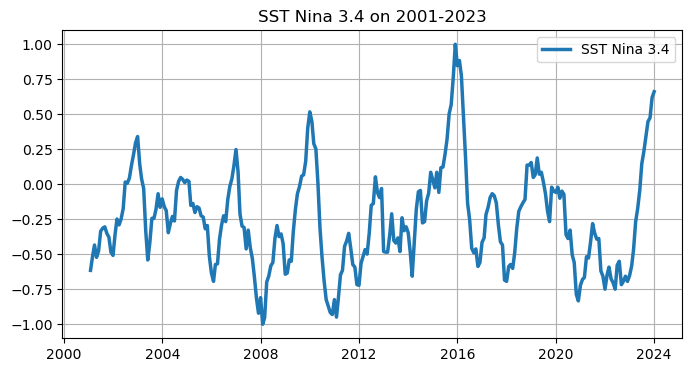

In [5]:
# results of normalizations min-max
lineplot1(x=dataset["acq_date"], y=scaled[:,1:2], label="SST Nina 3.4", title="SST Nina 3.4 on 2001-2023")

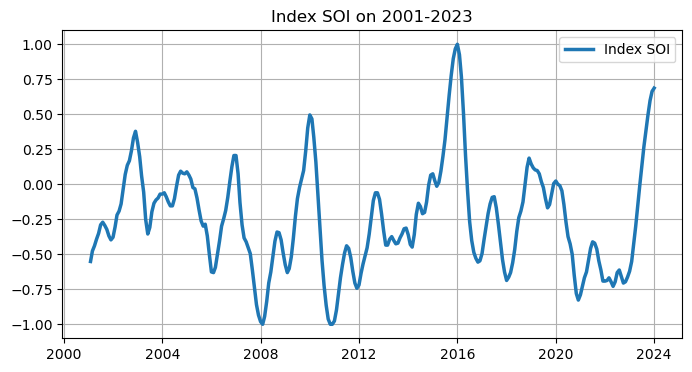

In [6]:
# results of normalizations min-max
lineplot1(x=dataset["acq_date"], y=scaled[:,2:3], label="Index SOI", title="Index SOI on 2001-2023")

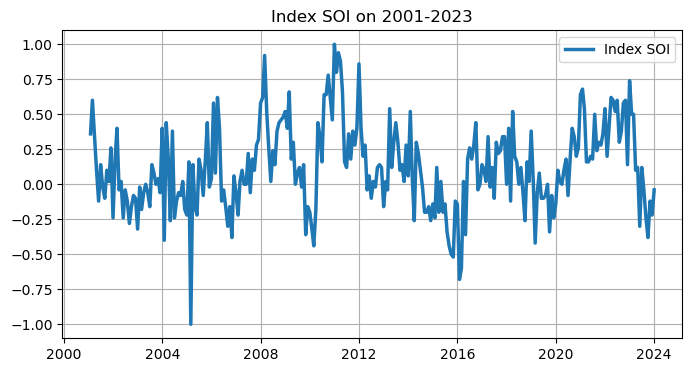

In [7]:
# results of normalizations min-max
lineplot1(x=dataset["acq_date"], y=scaled[:,3:4], label="Index SOI", title="Index SOI on 2001-2023")

### 3. Multivariate Supervised Learning

In [8]:
scaled = results_multivariate_supervised(scaled)

### 4. Data Splitting

In [9]:
# process splittings
train_data, test_data = splitting(scaled.values)

In [10]:
# results splittings
np.round(train_data[:5],5)

array([[-1.     , -0.61485, -0.5514 ,  0.36   , -0.99972],
       [-0.99972, -0.52204, -0.47664,  0.6    , -0.99903],
       [-0.99903, -0.43387, -0.43925,  0.34   , -0.99764],
       [-0.99764, -0.52204, -0.39252,  0.1    , -0.99501],
       [-0.99501, -0.47564, -0.35047, -0.12   , -0.99931]])

In [11]:
# split into input and outputs
x_train = train_data[:, :-1]
y_train = train_data[:, -1]

In [17]:
np.round(x_train[:5],5)

array([[-1.     , -0.61485, -0.5514 ,  0.36   ],
       [-0.99972, -0.52204, -0.47664,  0.6    ],
       [-0.99903, -0.43387, -0.43925,  0.34   ],
       [-0.99764, -0.52204, -0.39252,  0.1    ],
       [-0.99501, -0.47564, -0.35047, -0.12   ]])

In [16]:
np.round(y_train[:5],5)

array([-0.99972, -0.99903, -0.99764, -0.99501, -0.99931])

In [12]:
# results splittings
np.round(test_data[:5],5)

array([[-0.99903,  0.04872,  0.11682,  0.02   , -0.99931],
       [-0.99931,  0.06729,  0.1028 , -0.42   , -0.99792],
       [-0.99792,  0.18794,  0.09813, -0.06   , -0.99751],
       [-0.99751,  0.07193,  0.07477,  0.08   , -0.99002],
       [-0.99002,  0.08585,  0.01869, -0.1    , -0.99432]])

In [13]:
# split into input and outputs
x_test = test_data[:, :-1]
y_test = test_data[:, -1]

In [14]:
np.round(x_test[:5],5)

array([[-0.99903,  0.04872,  0.11682,  0.02   ],
       [-0.99931,  0.06729,  0.1028 , -0.42   ],
       [-0.99792,  0.18794,  0.09813, -0.06   ],
       [-0.99751,  0.07193,  0.07477,  0.08   ],
       [-0.99002,  0.08585,  0.01869, -0.1    ]])

In [15]:
np.round(y_test[:5],5)

array([-0.99931, -0.99792, -0.99751, -0.99002, -0.99432])